## Introduction
The purpose of Assessment 0 is to explore our chosen application domain and find resources to enable this group to more easily complete Assessment 1 which is creating a binary classifier. We have chosen to explore the financial sector as our application domain and more spcifically, loan data. In this section, some exploratory data analysis is performed on multiple datasets of loan applications. This was carried out over four varying loan datasets to help assess which one might be useful for Assessment 1.


This code consists of an explanation of loan approval data using Python programming language. There are quite a few libraries, but the [Pandas](https://www.geeksforgeeks.org/introduction-to-pandas-in-python/) library has been predominantly used in this case as a powerful source of data manipulation and analysis through various operations and structures. 
We are using a Python notebook here in [Jupyter labs](https://jupyterlab.readthedocs.io/en/stable/getting_started/overview.html) as a way of observing the data. The seaborn library is used, which relates to matplotlib, providing better-looking statistical plots for analysis. The datasets have been taken from Kaggle.

 We first need to import any packages that we will use later on. The main packages that we need are 'Pandas', 'Seaborn', and 'matplotlib' but numpy may also be useful and may be required within the other libraries that we use.

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

## Dataset 1
The first step would be to collect data from an online source, place it in the right directory, and call it using the pandas library. In most cases large chunks of data would be stored in a csv format and hence in this case the [read_csv](https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/) function would be appropriate to import the downloaded data and the **head()** function enables us to print only the first n rows in the dataset.


In [166]:
df=pd.read_csv('02-loan_data.csv')
df.head(n=25)

loan_id   no_of_dependents      education  self_employed   income_annum  \
0         1                  2       Graduate             No        9600000   
1         2                  0   Not Graduate            Yes        4100000   
2         3                  3       Graduate             No        9100000   
3         4                  3       Graduate             No        8200000   
4         5                  5   Not Graduate            Yes        9800000   
5         6                  0       Graduate            Yes        4800000   
6         7                  5       Graduate             No        8700000   
7         8                  2       Graduate            Yes        5700000   
8         9                  0       Graduate            Yes         800000   
9        10                  5   Not Graduate             No        1100000   
10       11                  4       Graduate            Yes        2900000   
11       12                  2   Not Graduate            Yes        6700000   
12       13                  3   Not Graduate            Yes        5000000   
13       14                  2       Graduate            Yes        9100000   
14       15                  1   Not Graduate             No        1900000   
15       16                  5   Not Graduate             No        4700000   
16       17                  2       Graduate            Yes         500000   
17       18                  4   Not Graduate            Yes        2900000   
18       19                  2       Graduate             No        2700000   
19       20                  5       Graduate             No        6300000   
20       21                  2       Graduate             No        5000000   
21       22                  4       Graduate             No        5800000   
22       23                  4       Graduate            Yes        6500000   
23       24                  0   Not Graduate            Yes         500000   
24       25                  0   Not Graduate             No        4900000   

     loan_amount   loan_term   cibil_score   residential_assets_value  \
0       29900000          12           778                    2400000   
1       12200000           8           417                    2700000   
2       29700000          20           506                    7100000   
3       30700000           8           467                   18200000   
4       24200000          20           382                   12400000   
5       13500000          10           319                    6800000   
6       33000000           4           678                   22500000   
7       15000000          20           382                   13200000   
8        2200000          20           782                    1300000   
9        4300000          10           388                    3200000   
10      11200000           2           547                    8100000   
11      22700000          18           538                   15300000   
12      11600000          16           311                    6400000   
13      31500000          14           679                   10800000   
14       7400000           6           469                    1900000   
15      10700000          10           794                    5700000   
16       1600000           4           663                    1300000   
17       9400000          14           780                    2900000   
18      10300000          10           736                    1000000   
19      14600000          12           652                   10300000   
20      19400000          12           315                    9500000   
21      14000000          16           530                    3800000   
22      25700000          18           311                   13100000   
23       1400000           2           551                     900000   
24       9800000          16           324                    3800000   

     commercial_assets_value   luxury_assets_value



**To extract information about data types and missing values**



In [167]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

**Analysing Education Level of Graduates and Non-Graduates using countplot() which is a fancier histogram**

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_39140\2421369418.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=df, palette='Set1')


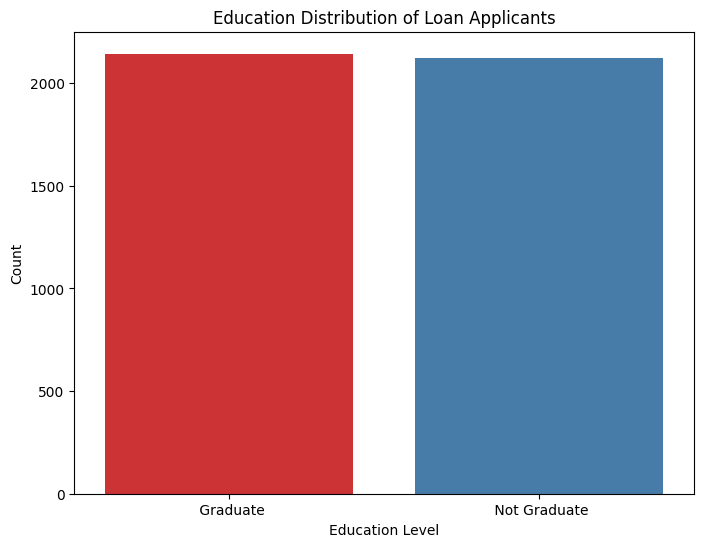

In [168]:
df.columns = df.columns.str.strip()
print(df.columns)
if 'education' in df.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x='education', data=df, palette='Set1')
    plt.title('Education Distribution of Loan Applicants')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.show()
else:
    print("The 'education' column was not found in the dataset.")

**Plotting Loan approval and Self-Employment** 

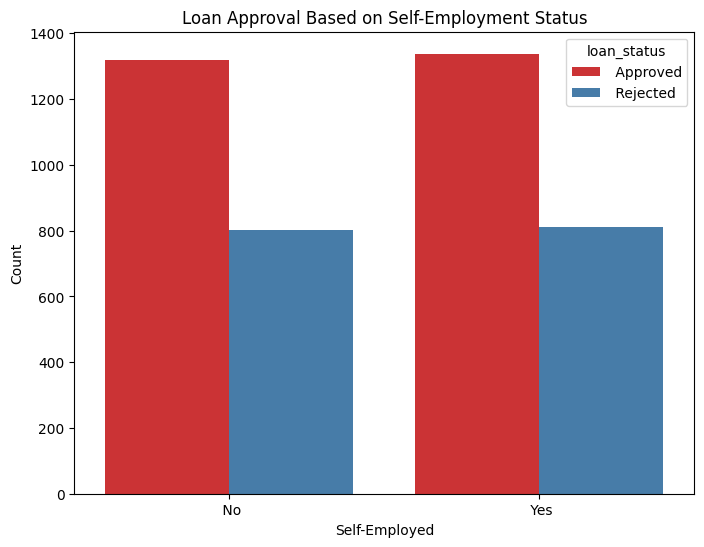

In [169]:
plt.figure(figsize=(8,6))
sns.countplot(x='self_employed', hue='loan_status', data=df, palette='Set1')
plt.title('Loan Approval Based on Self-Employment Status')
plt.xlabel('Self-Employed')
plt.ylabel('Count')
plt.show()

**Income Distribution**

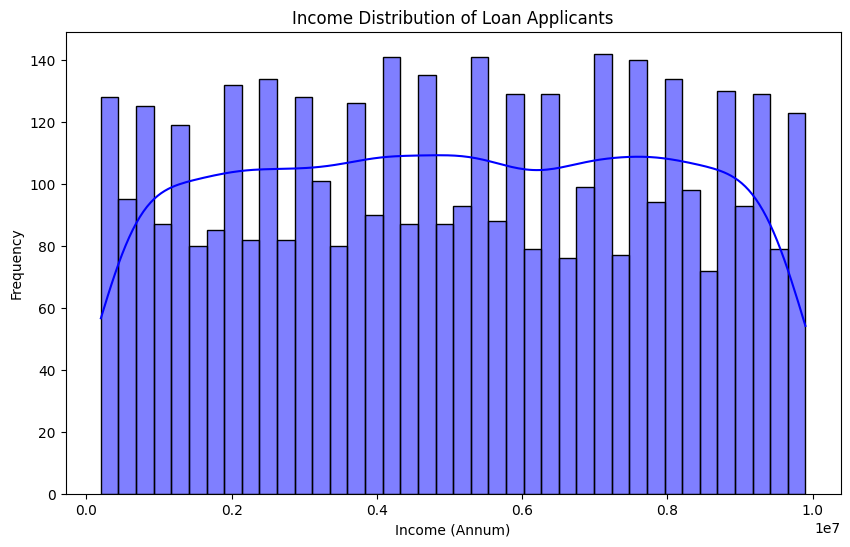

In [170]:
plt.figure(figsize=(10,6))
sns.histplot(df['income_annum'], bins=40, kde=True, color='blue')
plt.title('Income Distribution of Loan Applicants')
plt.xlabel('Income (Annum)')
plt.ylabel('Frequency')
plt.show()

**CIBIL score vs Loan Status**

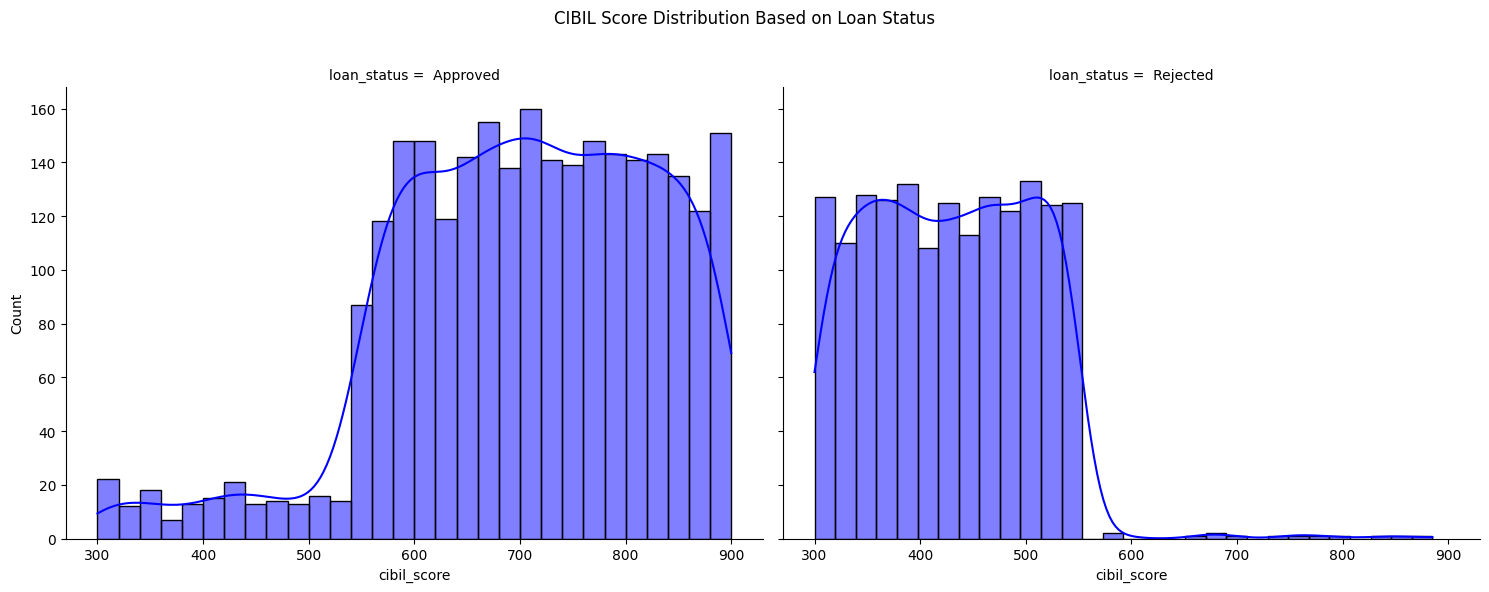

In [171]:
g = sns.FacetGrid(df, col='loan_status', height=6, aspect=1.25)
g.map(sns.histplot, 'cibil_score', bins=30, kde=True, color='blue')

plt.subplots_adjust(top=0.85)
g.fig.suptitle('CIBIL Score Distribution Based on Loan Status')
plt.show()

**Converting categorical variables into dummy/indicator variables, not affecting any other datatype**

In [172]:
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.head())

   loan_id  no_of_dependents  income_annum  loan_amount  loan_term  \
0        1                 2       9600000     29900000         12   
1        2                 0       4100000     12200000          8   
2        3                 3       9100000     29700000         20   
3        4                 3       8200000     30700000          8   
4        5                 5       9800000     24200000         20   

   cibil_score  residential_assets_value  commercial_assets_value  \
0          778                   2400000                 17600000   
1          417                   2700000                  2200000   
2          506                   7100000                  4500000   
3          467                  18200000                  3300000   
4          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value  education_ Not Graduate  \
0             22700000           8000000                    False   
1              8800000    

**Splitting data into train and test data**

In [173]:
X = df_encoded.drop('loan_status_ Rejected', axis=1) 
y = df_encoded['loan_status_ Rejected'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3415, 12)
X_test shape: (854, 12)
y_train shape: (3415,)
y_test shape: (854,)


**Fitting the train model with the test model**

In [174]:
X = df_encoded.drop('loan_status_ Rejected', axis=1)
y = df_encoded['loan_status_ Rejected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Accuracy (Decision Tree): 0.9754098360655737
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       536
        True       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



# Dataset 2

In [175]:
#The following imports the downloaded data file.
df = pd.read_csv("03-loan_data.csv")

#Set indexing to the loan ID
df = df.set_index('Loan_ID')

Now we take a look at what the first 5 lines of the data frame look like, and also set variables for the dimensions of this data set.

In [176]:
shape = df.shape
numcol = shape[1] # number of columns
numrow = shape[0] # number of rows (data entries)

print("Number of data entries:",numrow)

Number of data entries: 614


In [177]:
df.head(5)

Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                          
LP001002   Male      No          0      Graduate            No   
LP001003   Male     Yes          1      Graduate            No   
LP001005   Male     Yes          0      Graduate           Yes   
LP001006   Male     Yes          0  Not Graduate            No   
LP001008   Male      No          0      Graduate            No   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002             5849                0.0         NaN             360.0   
LP001003             4583             1508.0       128.0             360.0   
LP001005             3000                0.0        66.0             360.0   
LP001006             2583             2358.0       120.0             360.0   
LP001008             6000                0.0       141.0             360.0   

          Credit_History Property_Area Loan_Status  
Loan_ID                                             
LP001002             1.0         Urban           Y  
LP001003             1.0         Rural           N  
LP001005             1.0         Urban           Y  
LP001006             1.0         Urban           Y  
LP001008             1.0         Urban           Y

We can now see that there are only 614 data entries. This is not very many, so it is something to consider when later trying to build a model. Now let's see the rate at which the loans are accepted:

In [178]:
approved_loans = df['Loan_Status'].value_counts()['Y']
total_applicants = numrow

percent_Approved = (approved_loans/total_applicants)*100

print(percent_Approved)

68.72964169381108


We see here that across the entire data set, 68.73% of the loans are approved. We can use this as a baseline, to test whether any factors have a particular influence on this result.

We now move on to do the basic statistical analysis of all the conntinuous data.

In [179]:
df.describe() #This gets summary statistics for all the quantatitative variables

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

It is important to note that the count for each of these covarients is different. This indicates that there are some missing values in the data. We will address this in the next steps when we clean the data.


# Cleaning the data

The information on Kaggle about the data suggested that the data hadn't been cleaned. i.e. there are some missing values. Our statistical summary also reinforces this. So it is firstly important to locate these and then decide how to rectify them.


In [180]:
# Identifies which columns contain missing values
df.isnull().any()

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

We can see that the majority of columns in the data frame have at least one Nan entry. So what can we do about this? Perhaps we try removing the rows that contain this missing values.

In [181]:
copydf = df
copydf = copydf.dropna()
print(copydf.shape)
print(df.shape)


(480, 12)
(614, 12)


 If we remove rows that contain any invalid entries we lose 20% of the data, so it would be best to find an alternative option. Another option, is to not discard the whole row, but only ignore the Nan entry itself. i.e use the data entry (row) when looking at covariants that aren't the one with the invalid input.

# EDA

Now that the data has been cleaned/ we have identified potential areas where there may be issues, it is time to start presenting the data in a more visual and useful way.

## Quantitative data

First we will do a univariate analysis on the quantative data, and see if there are any correlations between each individual covariant and whether the loan is accepted.

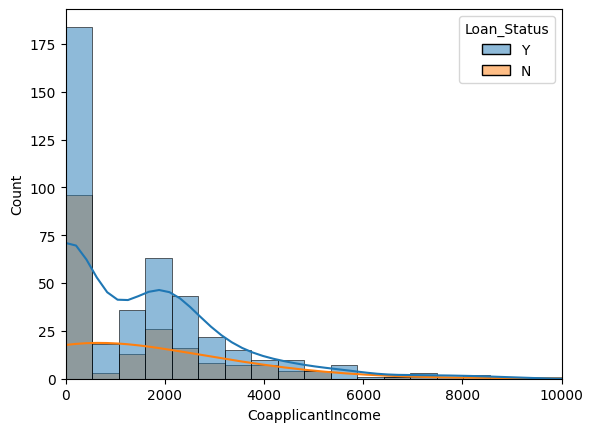

In [182]:
fig, ax = plt.subplots()
sns.histplot(data = df, x = df.CoapplicantIncome, hue = df.Loan_Status, ax=ax, kde = True)
ax.set_xlim(0,10000)
plt.show()

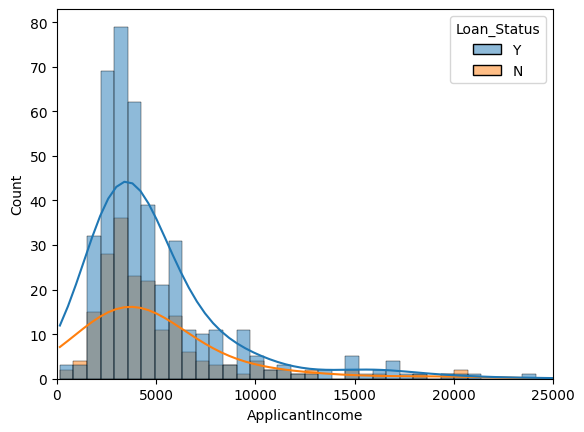

In [183]:
fig, ax = plt.subplots()
sns.histplot(data = df, x = df.ApplicantIncome, hue = df.Loan_Status, ax=ax, kde = True)
ax.set_xlim(0,25000)
plt.show()

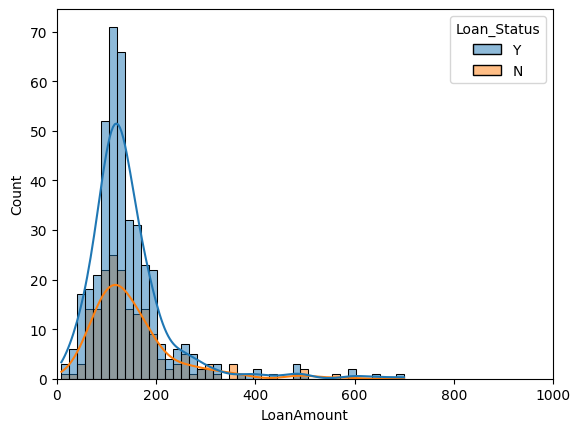

In [184]:
fig, ax = plt.subplots()
sns.histplot(data = df, x = df.LoanAmount, hue = df.Loan_Status, ax=ax, kde = True)
ax.set_xlim(0,1000)
plt.show()

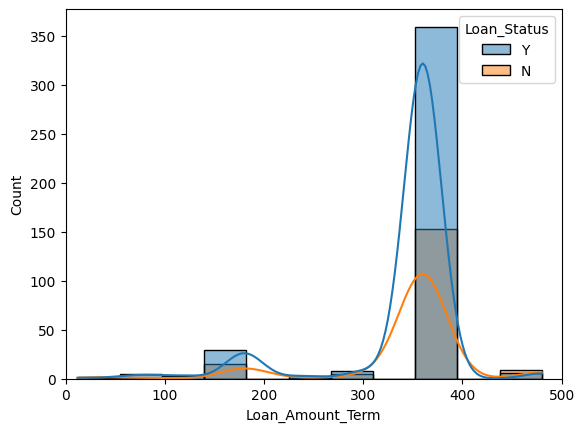

In [185]:
fig, ax = plt.subplots()
sns.histplot(data = df, x = df.Loan_Amount_Term, hue = df.Loan_Status, ax=ax, kde = True)
ax.set_xlim(0,500)
plt.show()

From the histograms above we can see that there is no obvious difference in the distribution of loans that aren't accepted compared to the ones that are. If we wanted to look at this further, we could try standardising the groups of accpeted and rejected loans so that we could compare them directly.

For now, we move on to look at a bivariate analysis for the different covariants. Let's start with looking at the loan amount vs. the applicants income. We use a scatter plot to do this:


<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

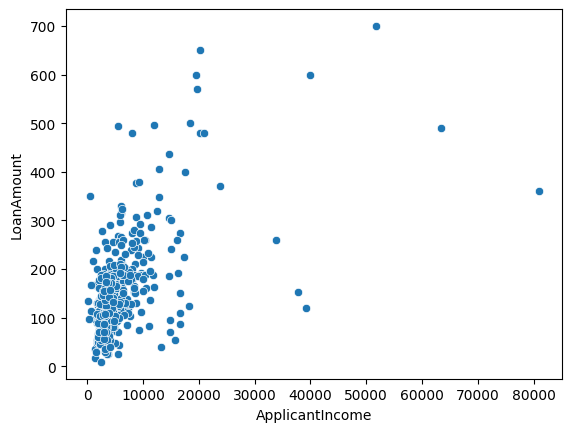

In [186]:
sns.scatterplot(data=df, x="ApplicantIncome", y="LoanAmount")

We can see a slight positive correlation. Now it may be useful to see how these two factors compared to whether the loan was accepted. (loan Status y/n)

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

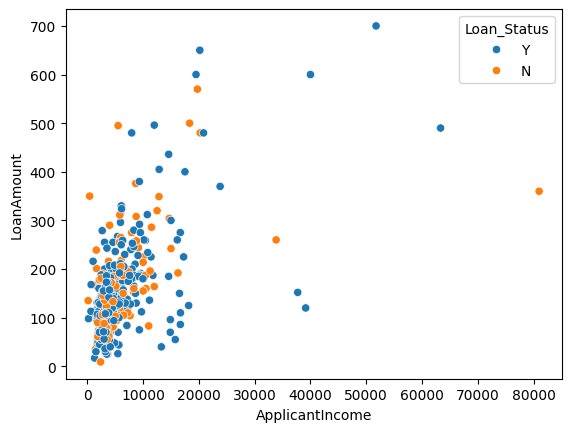

In [187]:
sns.scatterplot(data=df, x="ApplicantIncome", y="LoanAmount", hue="Loan_Status")

By adding colour to identify the satus of the loan, we can see how these two covariants don't have an immediately obvious correlation with whether a loan is accepted or not. 

We can use a pairplot to do the same for all quantative covariates.

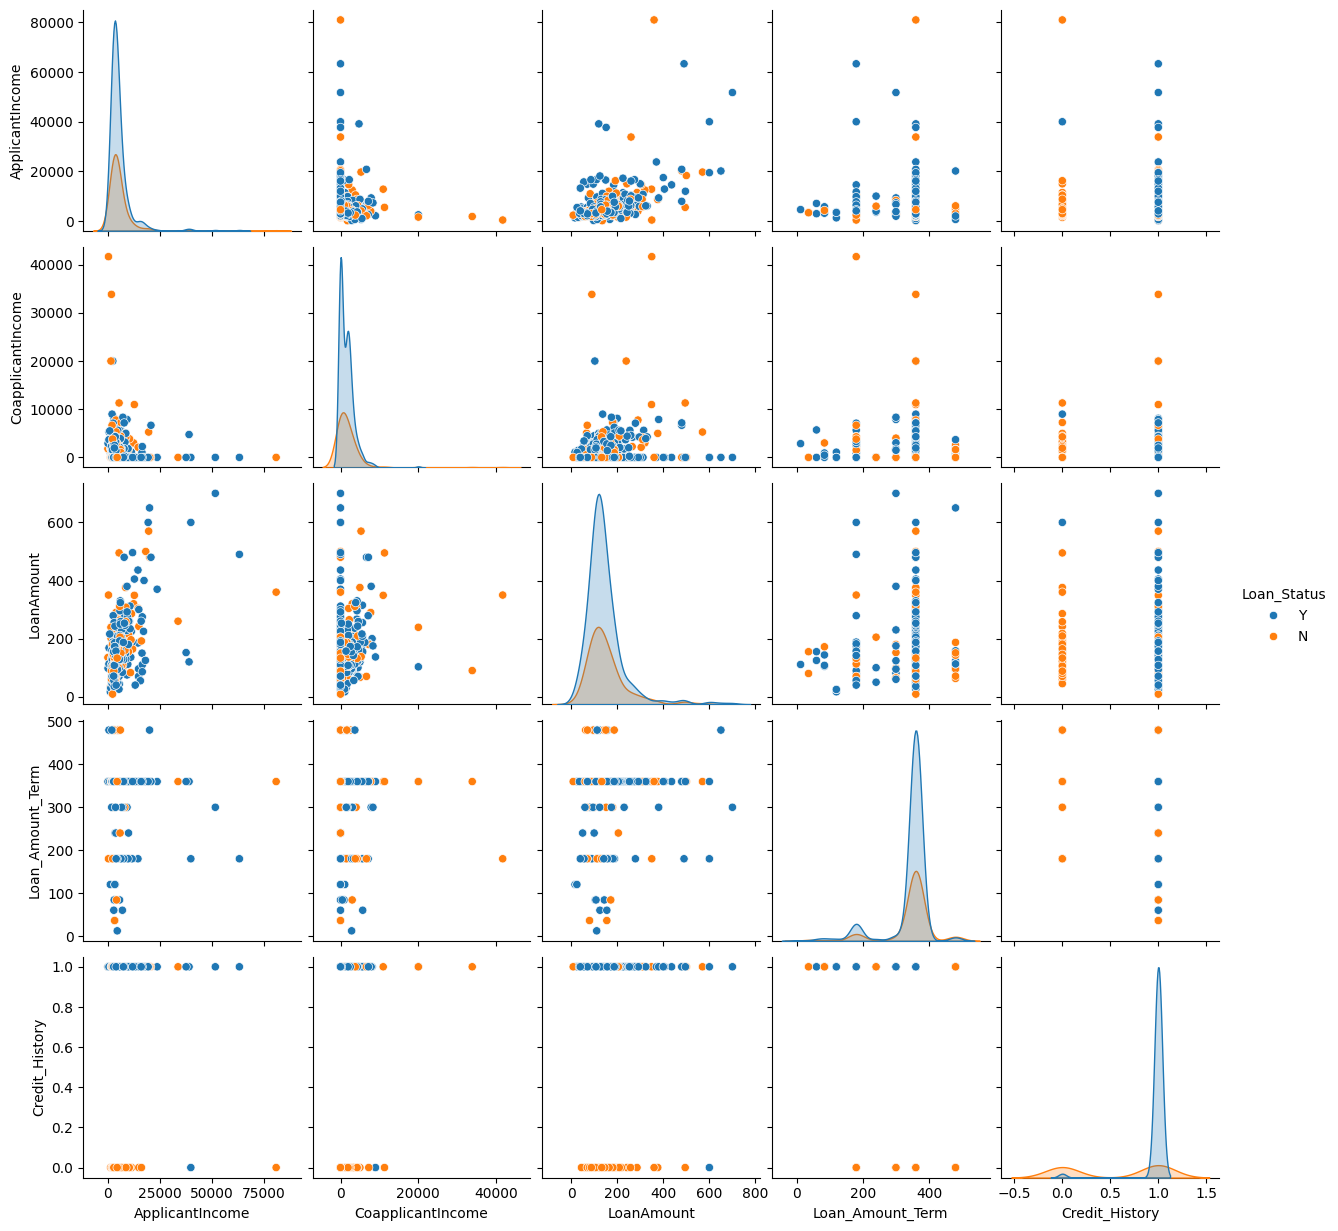

In [188]:
# Create pair plot
sns.pairplot(df, hue = 'Loan_Status')
plt.show()

We can see some trends that indicate different relationships between the covariants. A correlation marix can also be used to give exact values for their correlation, should there be any.

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000  


<Axes: >

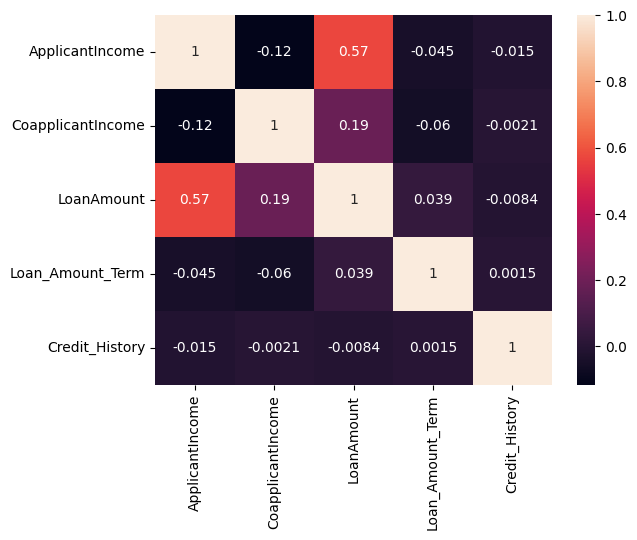

In [189]:
matrix = df.corr(numeric_only=True)
print(matrix)

sns.heatmap(matrix, annot = True)  # Uses seaborn to print a heatmap

Looking at the matrix we see that the LoanAmount covariant and ApplicantIncome covariant are the most highly correlated. With further expert knowledge, insight could be given about why this correlatio occurs. It could be something to consider when building a model, for example if one of these variables is slightly dependent on the other.

## Qualitative Data

We now start to look at the qualitative data. To do this we use cross tables. It is then useful to visualise them using a bar graph. On the plots we have added a horizontal black line which represents the ratio of accepted to rejected loans. It is useful to be able to compare how this ratio varies between being calculated for a particular input and the overall data set. It can be an easy way to spot which inputs may lean towards a rejection.

In [190]:
pd.crosstab(index = df.Loan_Status, columns = [df.Self_Employed], colnames=['self-employed'],normalize='columns')

self-employed     No       Yes
Loan_Status                   
N              0.314  0.317073
Y              0.686  0.682927

Here the normalise variable changes the numbers into ratios. We can see which proportion or accepted and rejected loans make up each column

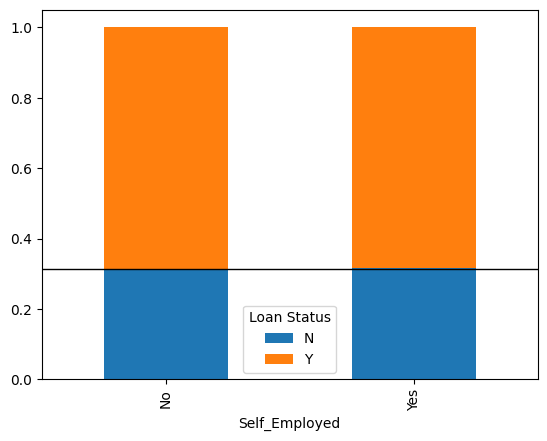

In [191]:
Plot_Self_Employed = pd.crosstab(index = df.Self_Employed, columns = [df.Loan_Status], colnames=['Loan Status'],normalize='index').plot.bar(stacked=True)
Plot_Self_Employed.axhline(y=0.3127, color= 'black', linewidth=1,)

In [192]:
pd.crosstab(index = df.Loan_Status, columns = [df.Married], colnames=['married'],normalize='columns')

married            No      Yes
Loan_Status                   
N            0.370892  0.28392
Y            0.629108  0.71608

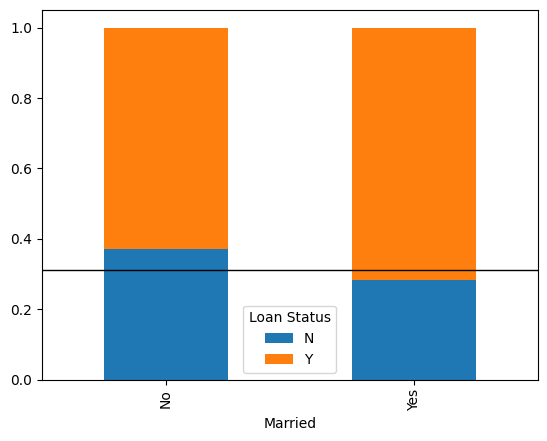

In [193]:
Plot_Married = pd.crosstab(index = df.Married, columns = [df.Loan_Status], colnames=['Loan Status'],normalize='index').plot.bar(stacked=True)
Plot_Married.axhline(y=0.3127, color= 'black', linewidth=1,)

In [194]:
pd.crosstab(index = df.Loan_Status, columns = [df.Gender], colnames=['gender'],normalize='columns')

gender         Female      Male
Loan_Status                    
N            0.330357  0.306748
Y            0.669643  0.693252

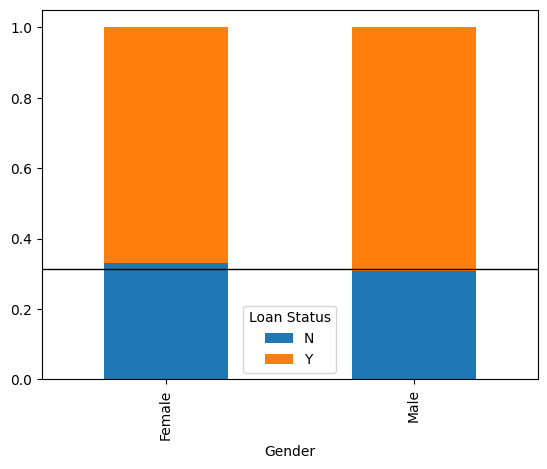

In [195]:
Plot_gender = pd.crosstab(index = df.Gender, columns = [df.Loan_Status], colnames=['Loan Status'],normalize='index').plot.bar(stacked=True)
Plot_gender.axhline(y=0.3127, color= 'black', linewidth=1,)

In [196]:
pd.crosstab(index = df.Loan_Status, columns = [df.Education], colnames=['Education'],normalize='columns')

Education    Graduate  Not Graduate
Loan_Status                        
N            0.291667       0.38806
Y            0.708333       0.61194

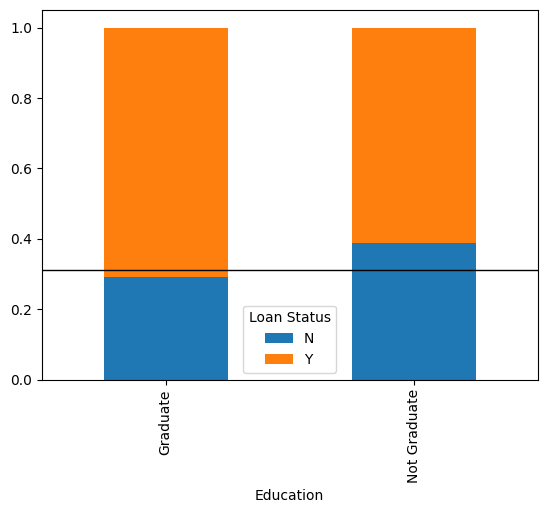

In [197]:
Plot_Area = pd.crosstab(index = df.Education, columns = [df.Loan_Status], colnames=['Loan Status'],normalize='index').plot.bar(stacked=True)
Plot_Area.axhline(y=0.3127, color= 'black', linewidth=1,)

In [198]:
pd.crosstab(index = df.Loan_Status, columns = [df.Property_Area], colnames=['Loan Status'],normalize='columns')

Loan Status     Rural  Semiurban     Urban
Loan_Status                               
N            0.385475    0.23176  0.341584
Y            0.614525    0.76824  0.658416

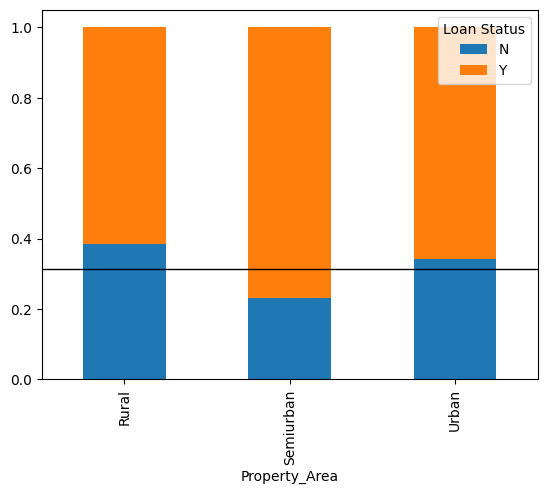

In [199]:
Plot_Area = pd.crosstab(index = df.Property_Area, columns = [df.Loan_Status], colnames=['Loan Status'],normalize='index').plot.bar(stacked=True)
Plot_Area.axhline(y=0.3127, color= 'black', linewidth=1,)

In [200]:
pd.crosstab(index = df.Loan_Status, columns = [df.Dependents], colnames=['Loan Status'],normalize='columns')

Loan Status         0         1         2        3+
Loan_Status                                        
N            0.310145  0.352941  0.247525  0.352941
Y            0.689855  0.647059  0.752475  0.647059

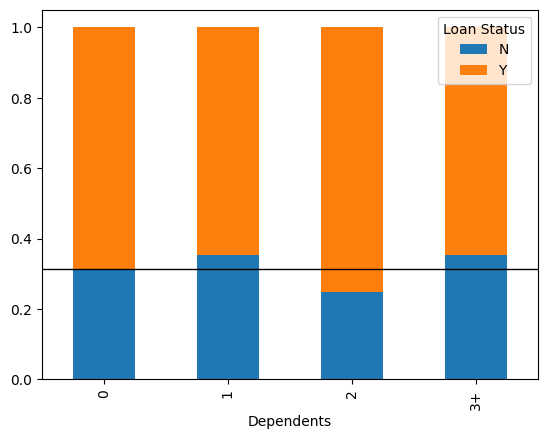

In [201]:
Plot_Dependents = pd.crosstab(index = df.Dependents, columns = [df.Loan_Status], colnames=['Loan Status'],normalize='index').plot.bar(stacked=True)
Plot_Dependents.axhline(y=0.3127, color= 'black', linewidth=1,)

## Conclusion
The initial EDA completed in this notebook has identified a few factors that could indeed be used to build a model for predicting whether a loan will be accepted or rejected. One potential way of building a model would be to use a binary classifier such a random forest or decision tree. These can be used by installing the sklearn library, which has lots of options for building different ML models. 

The issue with this data set is that there are not many entries. So by the time the data is split into a train, validation and test set, there will be very few data points in each set. This will lead to over-fitting and not produce a successful model. To overcome this issue, there are a few things that can be done. For example, bootstrapping to make more data available for use. Again, this will have its drawbacks, such as bias and increased variance. 

It would also be worth considering making a balanced data set. This includes equal numbers of rejected and accepted loans, therefore reducing the risk of an over-fitting model. 

## Dataset 3

In this section, I will be exploring a loan data set and analysing which factors affect whether or not someone will default a loan or not. Defaulting a loan is when you are unable to make a payment on time, hence breaching the loan contract. This is slitghly different to seeing whether or not a loan will be approved, however it is important to see also as it will show what information is most likely to cause problems during the approval process from a banks point of view. Hence therefore is highly related and interesting to see if the those rejected in the approval process and those that default a loan aline with similar income, age and other factors.



In [202]:
df = pd.read_csv("04-loan_data.csv") 
df

age  employ  address      income  debtinc  creddebt    othdebt  ed  \
0     29      11        7   32.000000      6.0  0.927360   0.992640   1   
1     28       1        3   26.000000     12.4  0.377208   2.846792   4   
2     34      16        3   75.000000     10.4  3.954600   3.845400   1   
3     51      31       14  249.000000      7.8  4.272840  15.149160   2   
4     40      13       11  102.000000     18.9  6.226794  13.051206   2   
..   ...     ...      ...         ...      ...       ...        ...  ..   
480   41      16       17   68.000000      5.4  0.447984   3.224016   1   
481   23       0        1   42.000000      3.9  1.018836   0.619164   2   
482   47      26       21  100.000000     12.8  4.582400   8.217600   1   
483   24       7        0   18.000000      6.5  0.526500   0.643500   1   
484   32      12        1   44.448802     14.4  3.195936   4.580064   2   

     default  
0          0  
1          0  
2          0  
3          0  
4          1  
..       ...  
480        0  
481        1  
482        0  
483        0  
484        0  

[485 rows x 9 columns]

This is a preproccessed data set but just to check if there any missing values:

In [203]:
df.isnull().sum()

age         0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
ed          0
default     0
dtype: int64

age           int64
employ        int64
address       int64
income      float64
debtinc     float64
creddebt    float64
othdebt     float64
ed            int64
default       int64
dtype: object


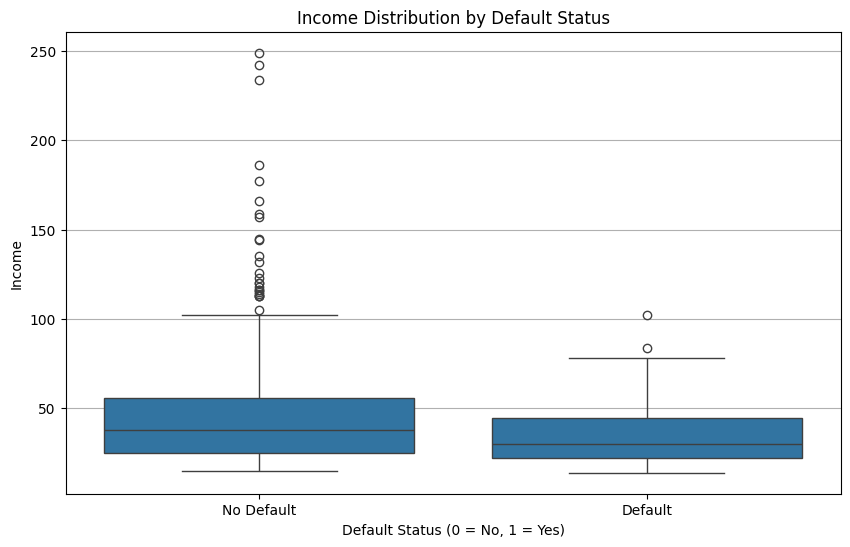

In [204]:

print(df.dtypes)
df['default'] = df['default'].astype('category')

plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='income', data=df)
plt.title('Income Distribution by Default Status')
plt.xlabel('Default Status (0 = No, 1 = Yes)')
plt.ylabel('Income')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.grid(axis='y')
plt.show()


Education level corresponds to the highest level of education of a person, 1 being the lowest corresponding to High school, 2 = Undergraduate, 3=Graduate, 4=Postgraduate, 5+=Beyond

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_39140\2238724228.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  edu_default_counts = df.groupby(['ed', 'default']).size().reset_index(name='count')


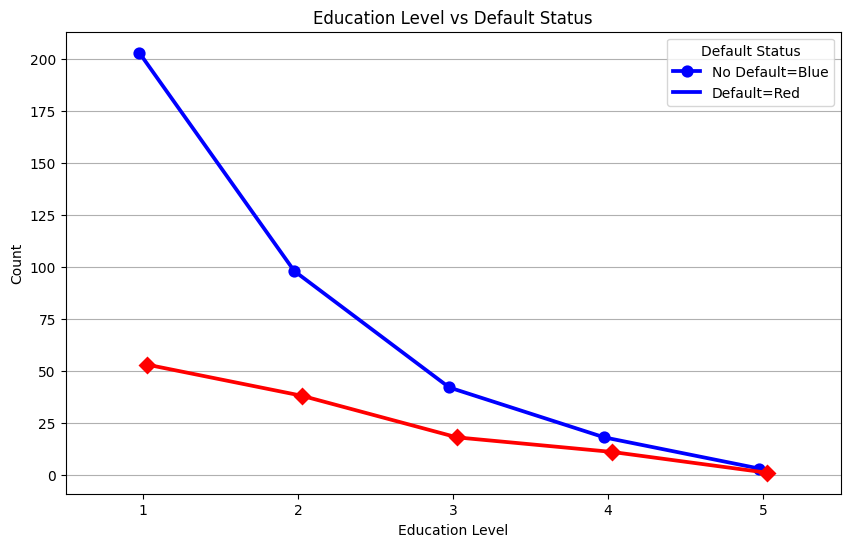

In [205]:
plt.figure(figsize=(10, 6))
palette = {0: 'Blue', 1: 'Red'}

edu_default_counts = df.groupby(['ed', 'default']).size().reset_index(name='count')
sns.pointplot(data=edu_default_counts, x='ed', y='count', hue='default', palette=palette, markers=["o", "D"], dodge=True)

plt.title('Education Level vs Default Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['1', '2', '3', '4', '5'])
plt.legend(title='Default Status', labels=['No Default=Blue', 'Default=Red'], loc='upper right')
plt.grid(axis='y')
plt.show()

This for the most part is inconclusive to suggest that any education level results in more likely chance of defaulting a loan, there is slight evidence to suggest that being a postgraduate or having a higher education level could result in higher chance but small sample size. 

Having done a brief investigation into seeing a correlation between two random features and defaulting a loan, We will now have a look at which features have a high correlation via a heatmap and then looking at each pairwise plot to see what features to investigate further

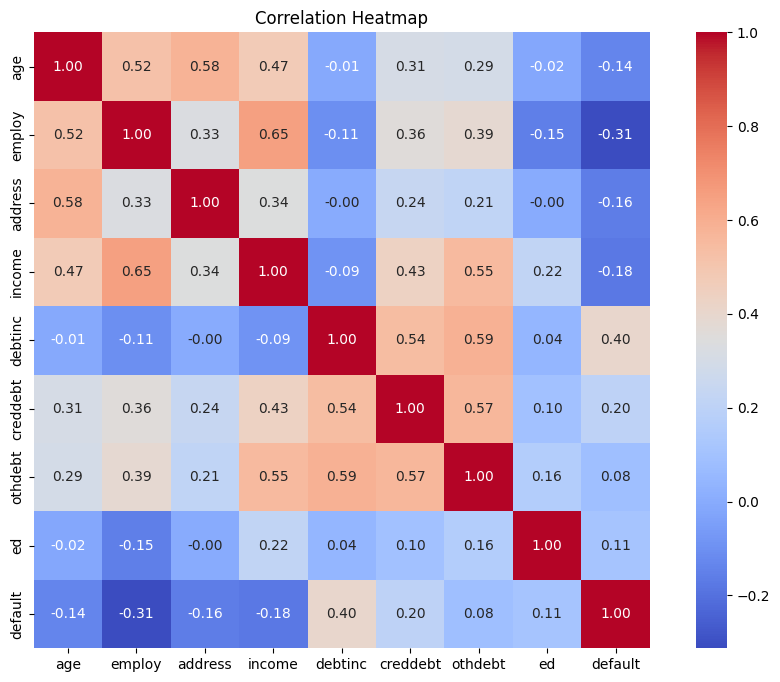

In [206]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


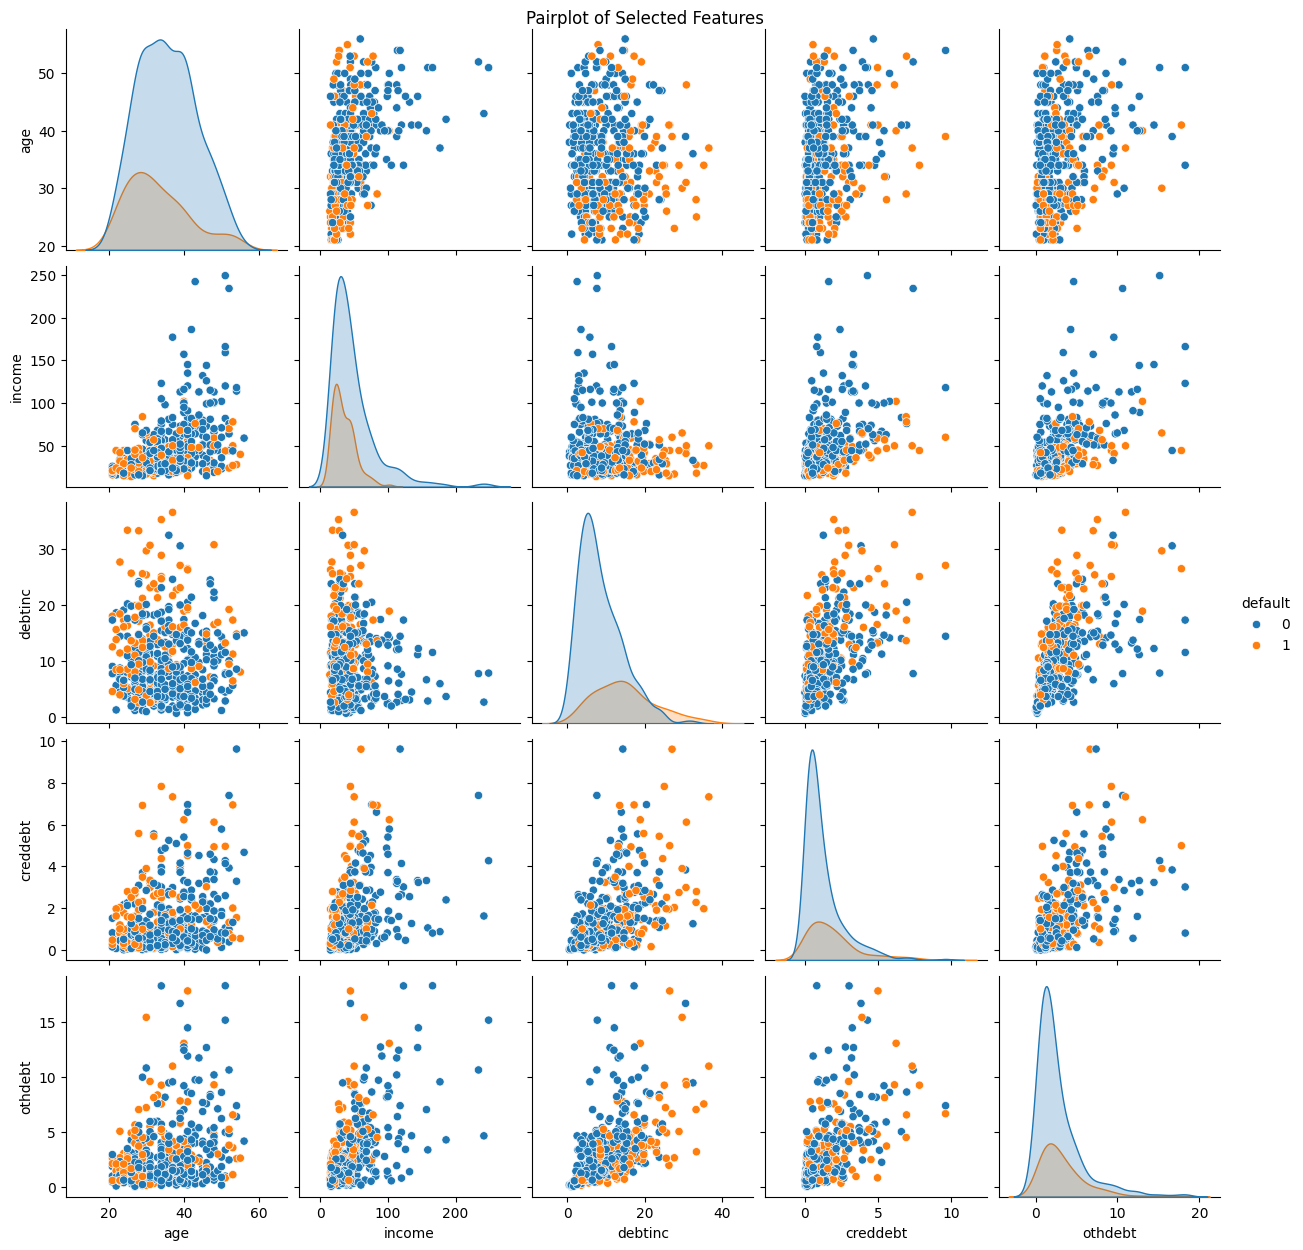

In [207]:
sns.pairplot(data=df, hue='default', vars=['age', 'income', 'debtinc', 'creddebt', 'othdebt'])
plt.suptitle('Pairplot of Selected Features', y=1.00)
plt.show()


The graphs on the diagonal show the better the distrubition of the its own data. Below is an enlarged version of one of these pairwise plots.

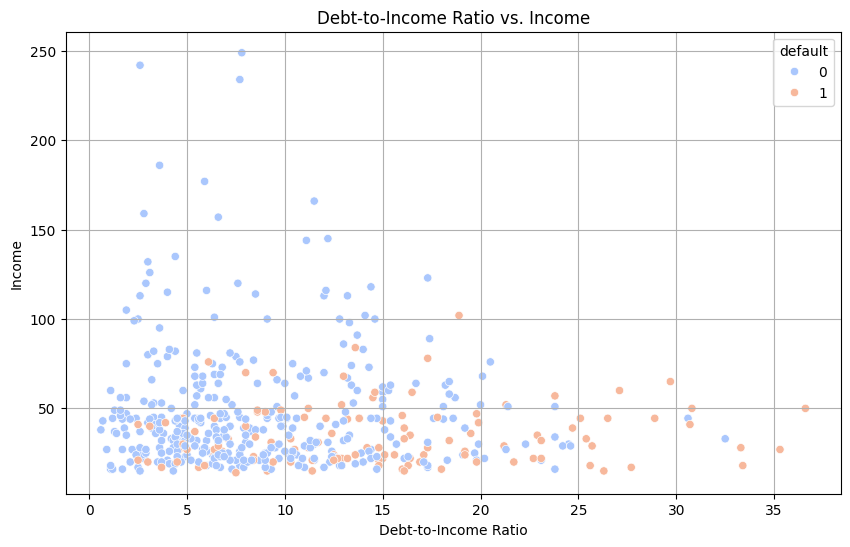

In [208]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='debtinc', y='income', hue='default', data=df, palette='coolwarm')
plt.title('Debt-to-Income Ratio vs. Income')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Income')
plt.grid()
plt.show()

From the above correlations, the most interesting result we can investigate is the link between defaulting the loan and debtinc ratio. Below is an example of using a decision tree to model the data by splitting the data in training data, validation data and test data and seeing whether the model can accurately predict if someone will not default or will default. 

In [209]:
X = df[['debtinc']]  
y = df['default']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Accuracy: 0.7628865979381443
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        70
           1       0.61      0.41      0.49        27

    accuracy                           0.76        97
   macro avg       0.70      0.65      0.67        97
weighted avg       0.75      0.76      0.75        97



The model has quite a low accuracy when predicting whether someone will default or not, indicating that some adjustments to the model are needed. This is likely due to the data set being quite small to make an accurate model from the training data.

## Dataset 4
The purpose of Assessment 0 is to explore our chosen application domain and find resources to enable this group to more easily complete Assessment 1 which is creating a binary classifier. We have chosen to explore the financial sector as our application domain and more spcifically, loan data. In this section, some exploratory data analysis is performed on a dataset of loan applications.

This dataset is sourced from Kaggle but originally it was taken from `LendingClub.com`. This is a website that connects borrowers and lenders. The features of this dataset are loan application details and the target variable is whether a borrower fully paid back their loan.



#### Import Statements
First, we import the necessary Python packages. Most of these packages are standard data science packages with one exception - `opendatasets`. This package allows the notebook to query Kaggle for a dataset. To do this, a Kaggle account was created and a Kaggle key generated. So that this download works, a JSON file containing a `username` and `key` field is needed in the same folder. As it is bad practice to put keys on GitHub, they are kept on a group member's local computer. When the notebook is run on that computer and there is no folder `loan-data`, the JSON file is retreived from Kaggle. As it will not always be the case that this same team member is running the notebook, a downloaded version of the dataset has been included for convenience. 

In [210]:
from IPython.display import display
import opendatasets as od

When the cell below is run, enter "." for both the username and key.

In [211]:
od.download("https://www.kaggle.com/datasets/itssuru/loan-data") 

Skipping, found downloaded files in ".\loan-data" (use force=True to force download)


#### Feature Explanation
We explain the names of the columns in the dataset and below we display the dataset. Note that the `fully.paid` column is the targer variable for the upcoming binary classifier and all the other variables are the features.

| Column Name              | Full Column Name | Explanation |
| :---------------- | :---------------- | :------: |
| credit.policy   | Credit Policy   |   1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.   |
| purpose | Purpose           |   The purpose of the loan.   |
| int.rate | Interest Rate    |  The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.   |
| installment | Installment |  The monthly installments owed by the borrower if the loan is funded.   |
| log.annual.in | Log Annual Income |  The natural log of the self-reported annual income of the borrower. |
| dti | Debt-to-Income Ratio |  The debt-to-income ratio of the borrower (amount of debt divided by annual income). |
| fico | FICO Score | The FICO credit score of the borrower. |
| days.with.cr.line | Days with Credit Line |  The number of days the borrower has had a credit line.   |
| revol.bal | Revolving Balance |  The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).   |
| revol.util | Revolving Utilisation Score |  The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). |
| inq.last.6mths | Inquiries In Last 6 Months |  The borrower's number of inquiries by creditors in the last 6 months. |
| delin.2yrs | Delinqincies in 2 Years|  The number of times the borrower had been 30+ days past due on a payment in the past 2 years.   |
| pub.rec.policy | Public Records |  The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).   |
| not.fully.paid | Not Fully Paid |  1 if the borrower has not fully paid the loan back and 0 otherwise.   |


In [212]:
loans_data_set_path = os.getcwd() + os.sep + "05-loan_data.csv"
loans_df = pd.read_csv(loans_data_set_path)
numeric_loans_df = loans_df._get_numeric_data()
display(loans_df)

credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
0                  0            0        0               0  
1                  0            0        0               0  
2                  1            0        0               0  
3                  1            0        0               0  
4                  0            1        0               0  
...              ...          ...      ...             ...  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1  

[9578 rows x 14 columns]

We can see below that all the values in the dataset are valid and therefore there is no data cleaning needed.

In [213]:
print(loans_df.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


#### Data summaries
Below is the summary statistics table. We have also included some kernel density estimates to visualise these distributions.

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

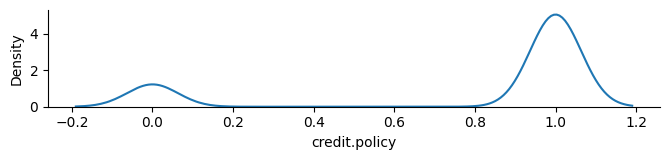

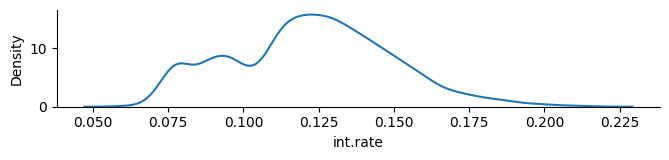

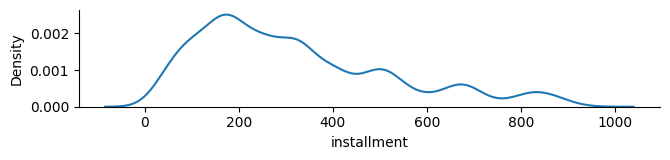

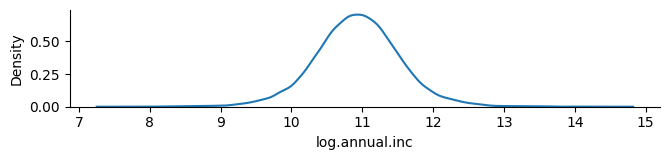

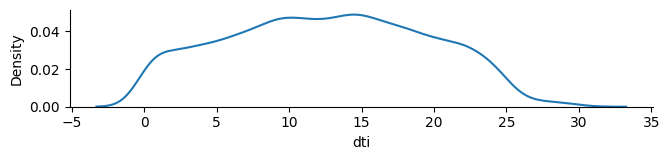

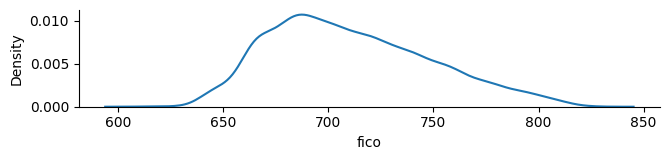

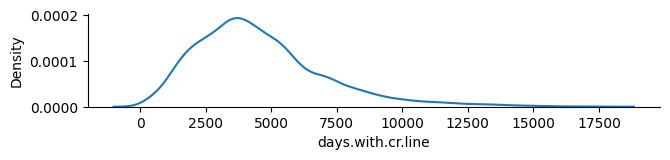

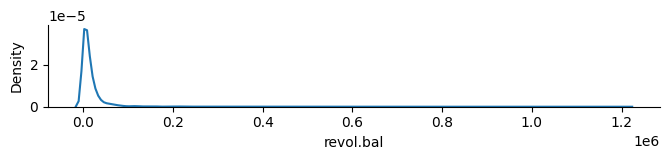

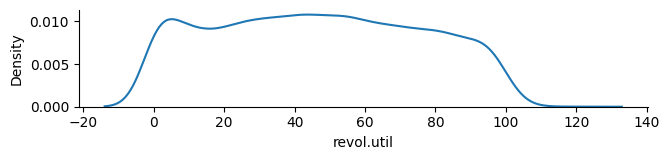

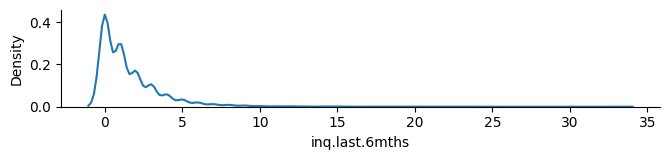

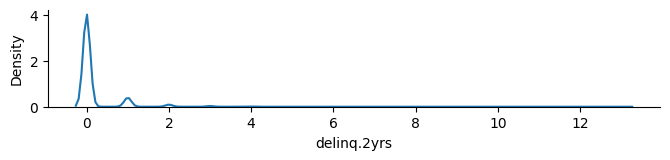

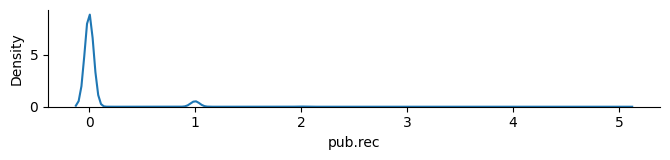

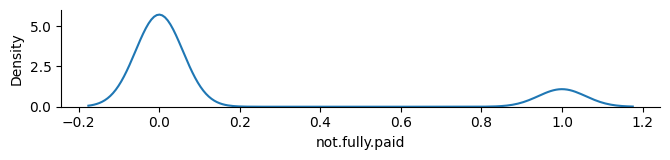

In [214]:
display(loans_df.describe())

for i in list(loans_df):
    if pd.api.types.is_numeric_dtype(loans_df[i]):
        g = sns.FacetGrid(loans_df, height=1.7, aspect=4,)
        g.map(sns.kdeplot, i)

We take the logarithms of `dti` and `revol.util` columns so that the data looks to be distributed more like a normal distribution. After, we plot the kernel densities of these new columns.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_39140\720554323.py:1: RuntimeWarning: divide by zero encountered in log
  loans_df["dti"] = loans_df["dti"].apply(lambda x: np.log(x))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_39140\720554323.py:2: RuntimeWarning: divide by zero encountered in log
  loans_df["revol.util"] = loans_df["revol.util"].apply(lambda x: np.log(x))


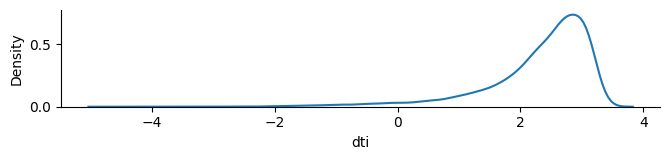

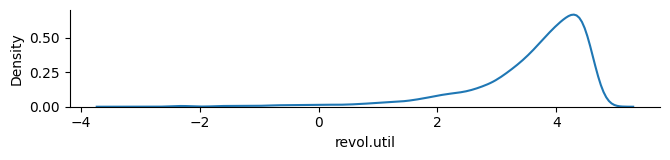

In [215]:
loans_df["dti"] = loans_df["dti"].apply(lambda x: np.log(x))
loans_df["revol.util"] = loans_df["revol.util"].apply(lambda x: np.log(x))

g = sns.FacetGrid(loans_df, height=1.7, aspect=4,)
g.map(sns.kdeplot, "dti")
g = sns.FacetGrid(loans_df, height=1.7, aspect=4,)
g.map(sns.kdeplot, "revol.util")


#### Relationships Between Columns
Below we try to see if there are any relationships between any of the two features by creating a scatter plot `PairGrid`.

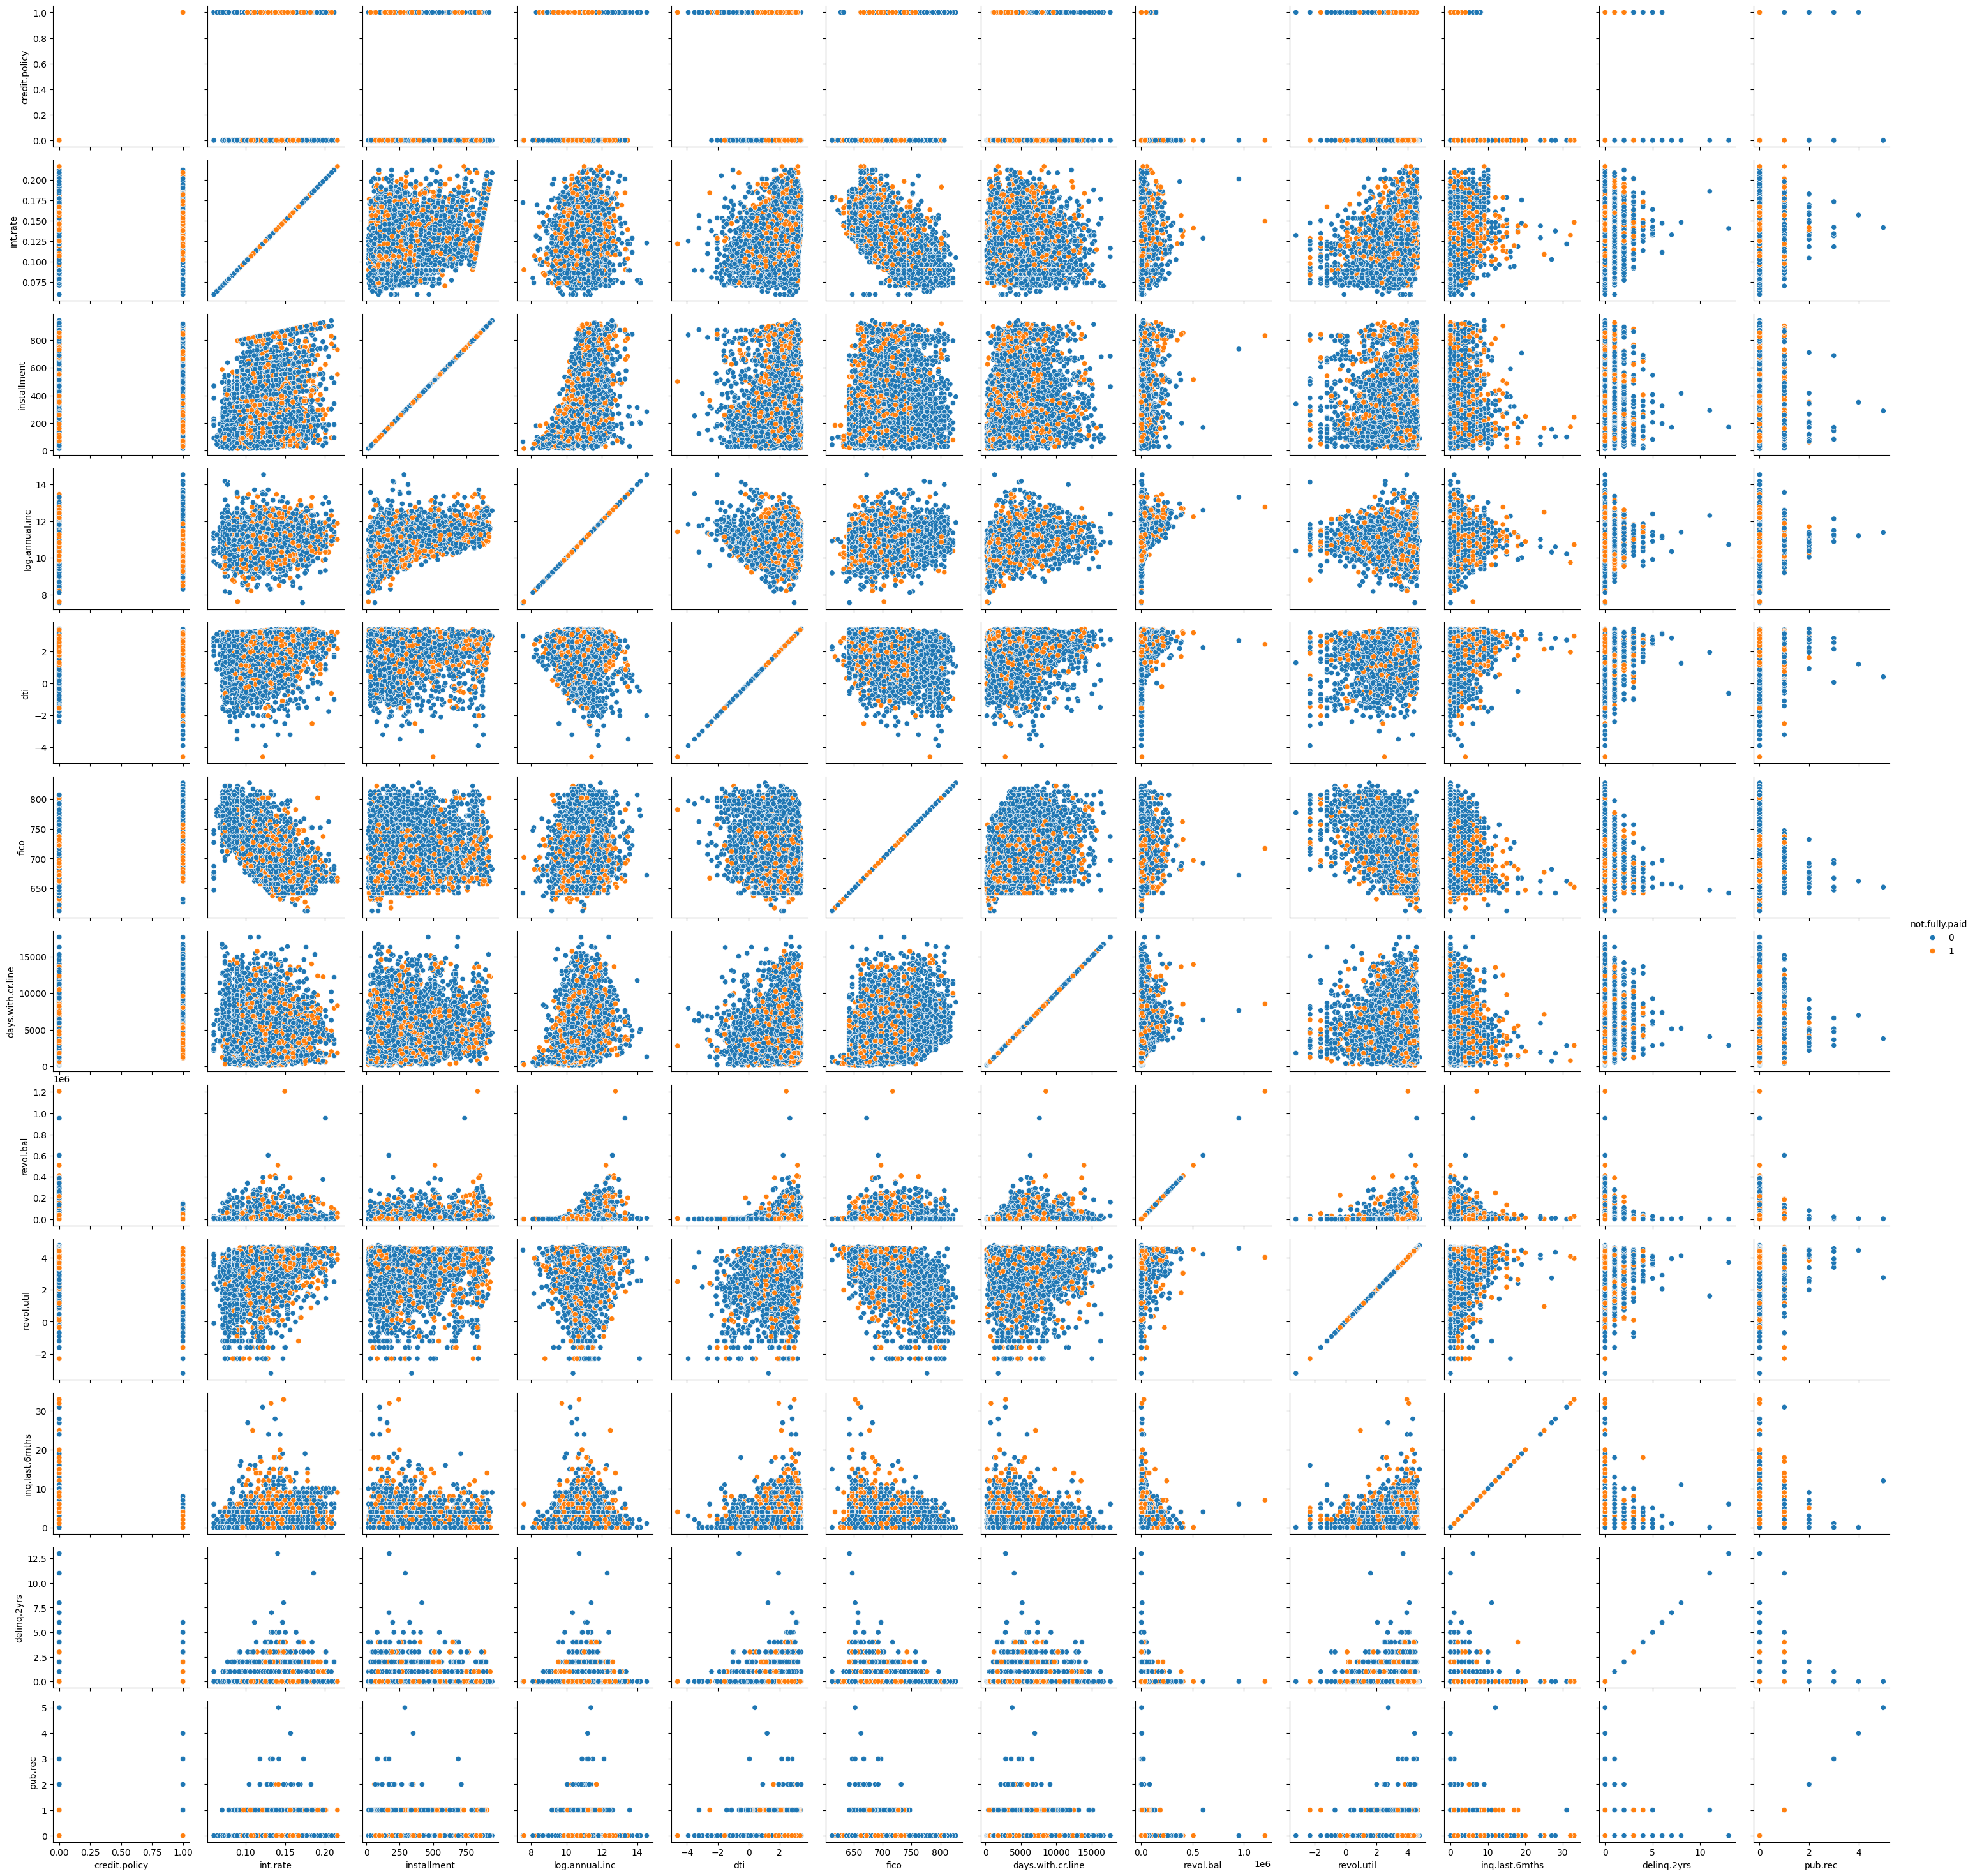

In [216]:
g = sns.PairGrid(loans_df, hue="not.fully.paid")
g.map(sns.scatterplot)
g.add_legend()

As dimension reduction is important, we would like to see if there are any features that are highly correlated in order to remove some. This is done by creating a heatmap that shows the correlation coefficients between all the features.

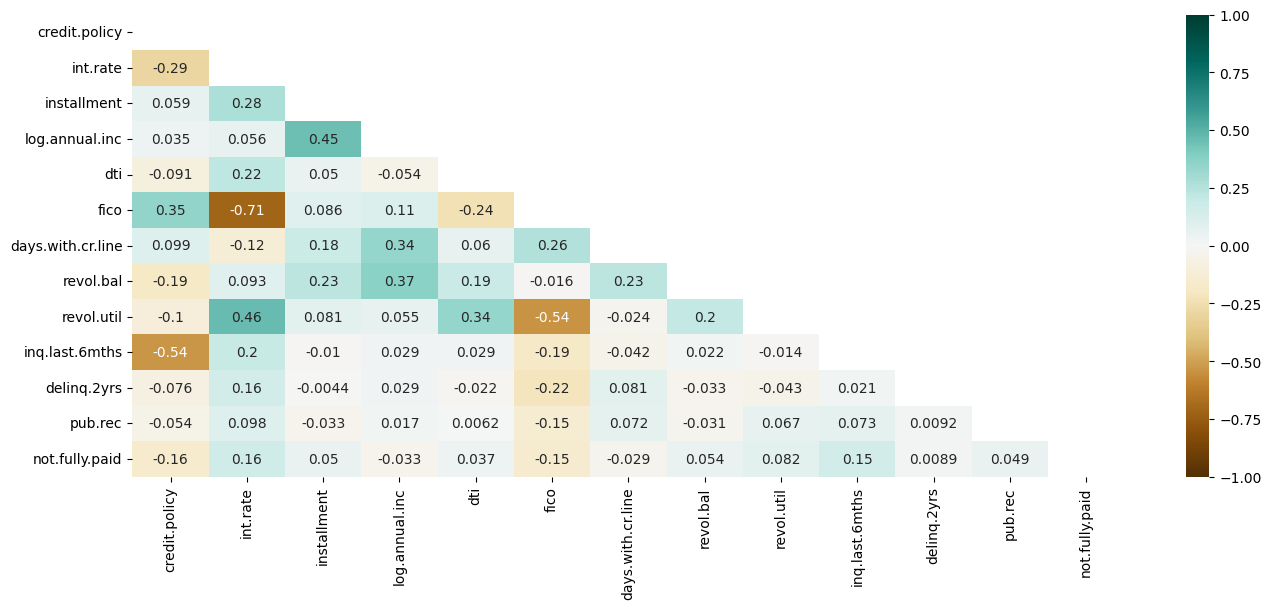

In [217]:
plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(numeric_loans_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(numeric_loans_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

As the one column of categorical data is the purpose of each loan, it might be interesting to ask if the data should be disaggregated between these loan purposes. This might tell us whether splitting the data between these loan purposes makes a difference in whether an applicant has paid back their loan or not.

<Axes: xlabel='purpose', ylabel='not.fully.paid'>

<Figure size 1600x600 with 0 Axes>

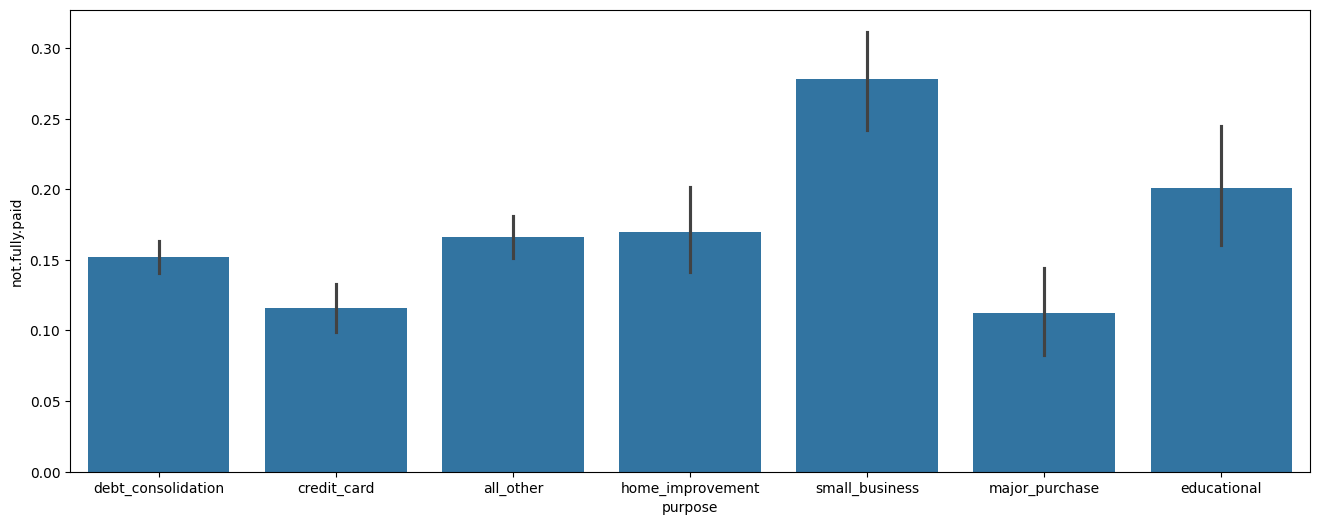

In [218]:
plt.figure(figsize=(16, 6))
plt.figure(figsize=(16, 6))
sns.barplot(loans_df, x="purpose", y="not.fully.paid")

In this first plot, we can see that there is a difference between the proportion of loans that pay back their loans depending on their loan purpose. Now, we look at the difference in other features once we disaggregatte the data into loan purposes.

<Figure size 1600x600 with 0 Axes>

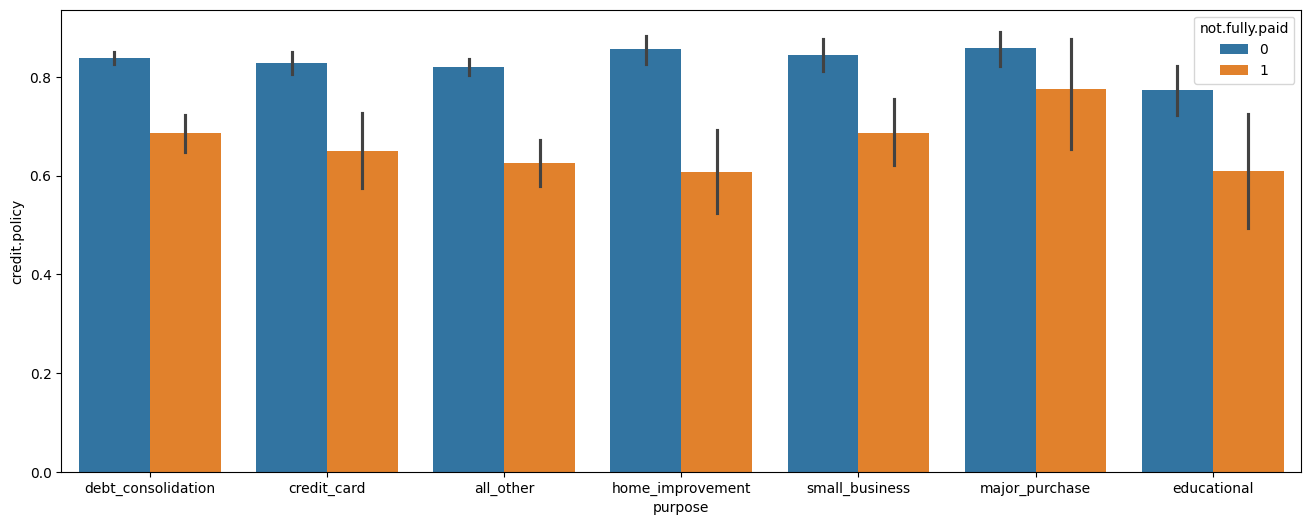

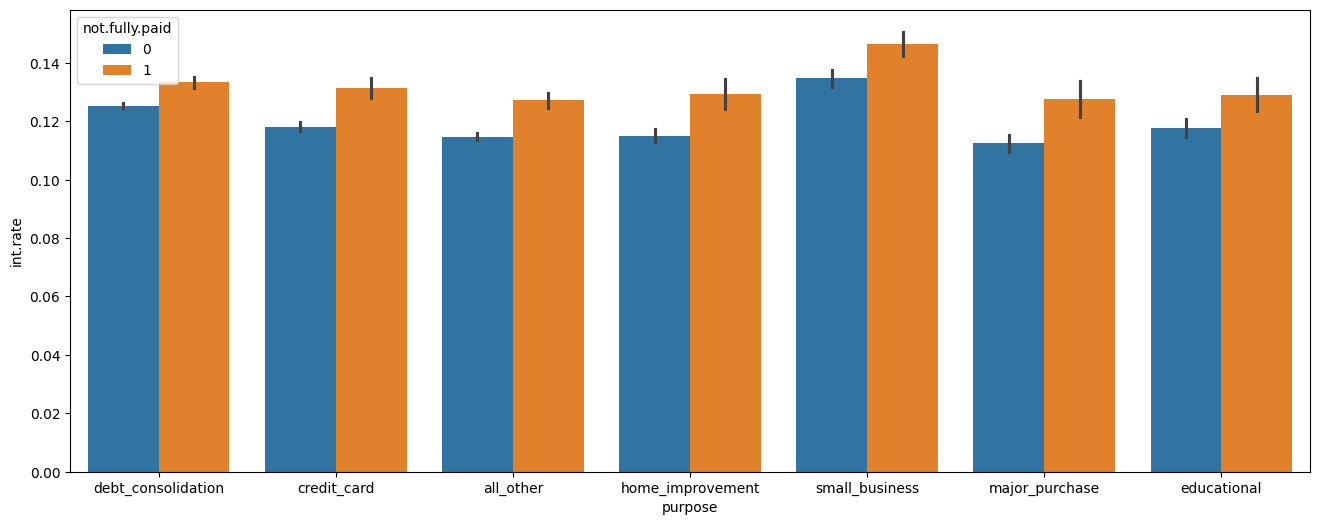

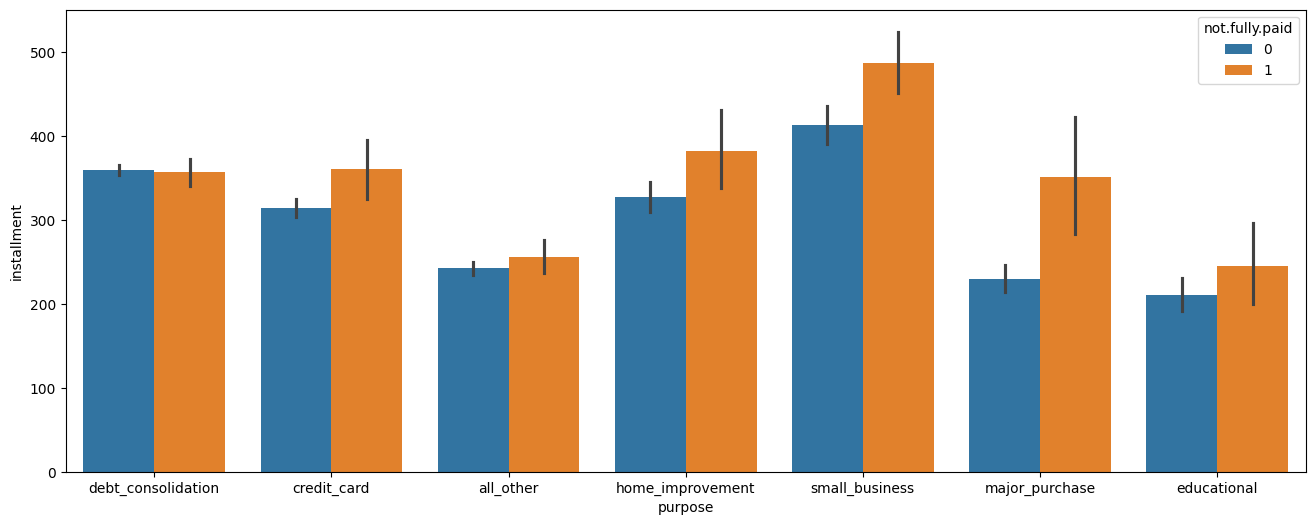

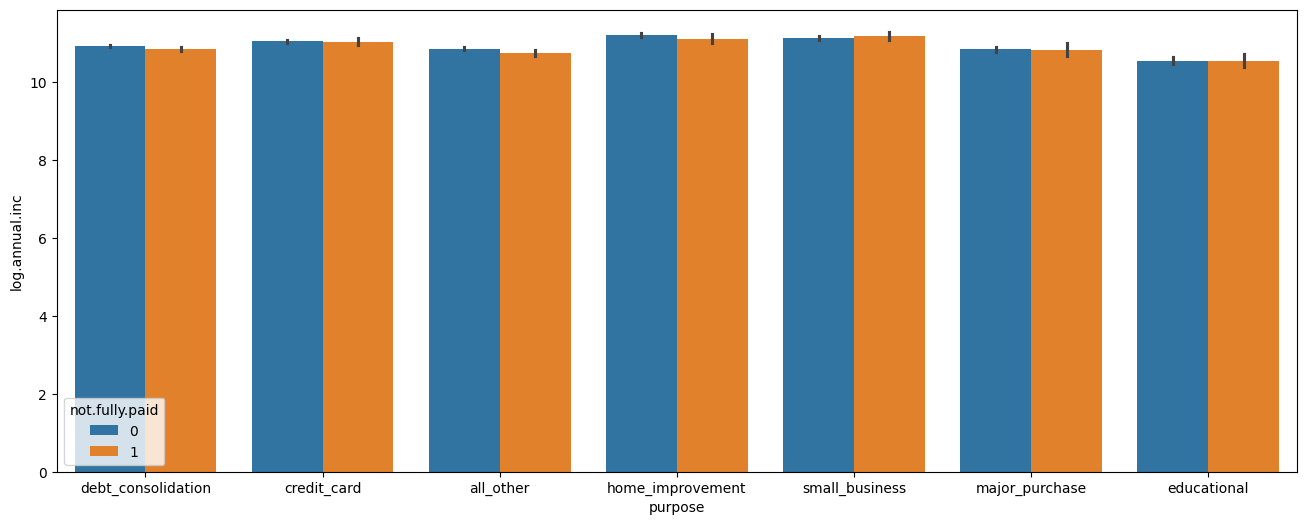

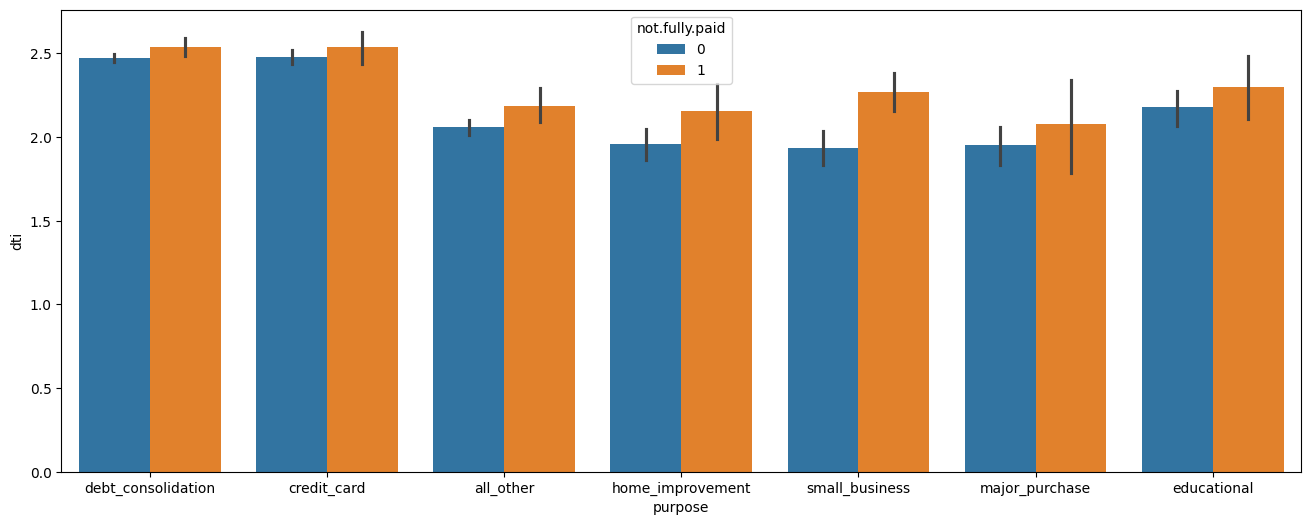

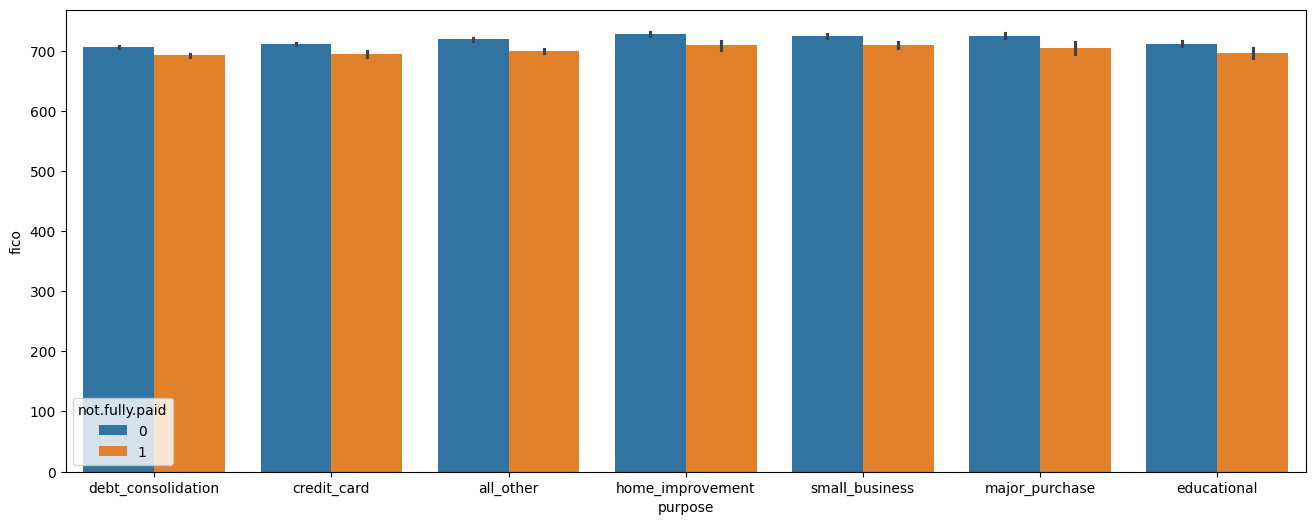

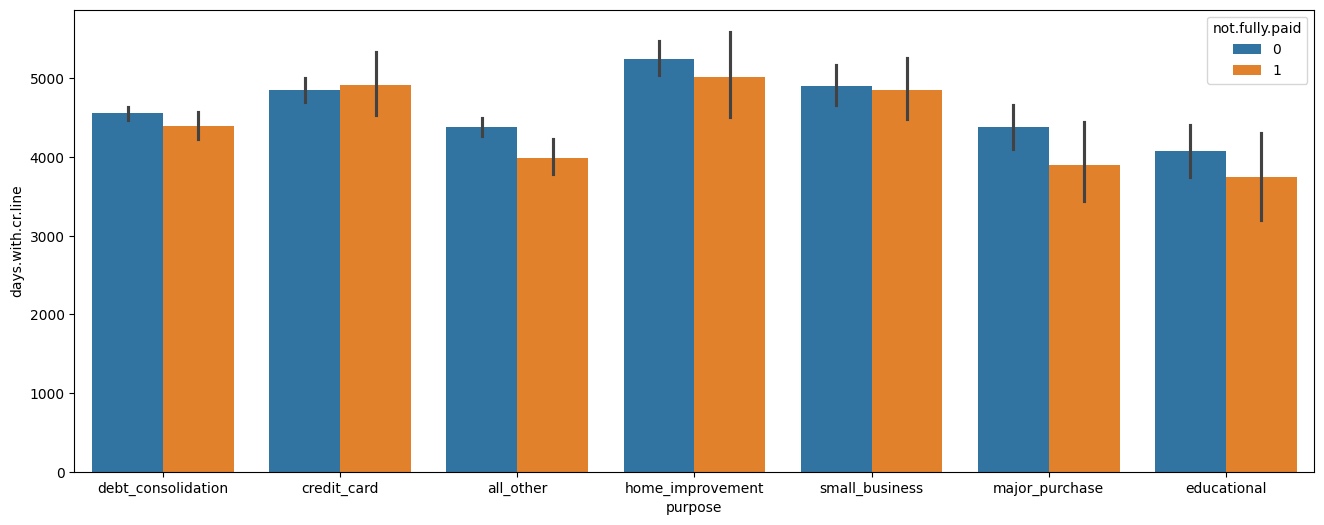

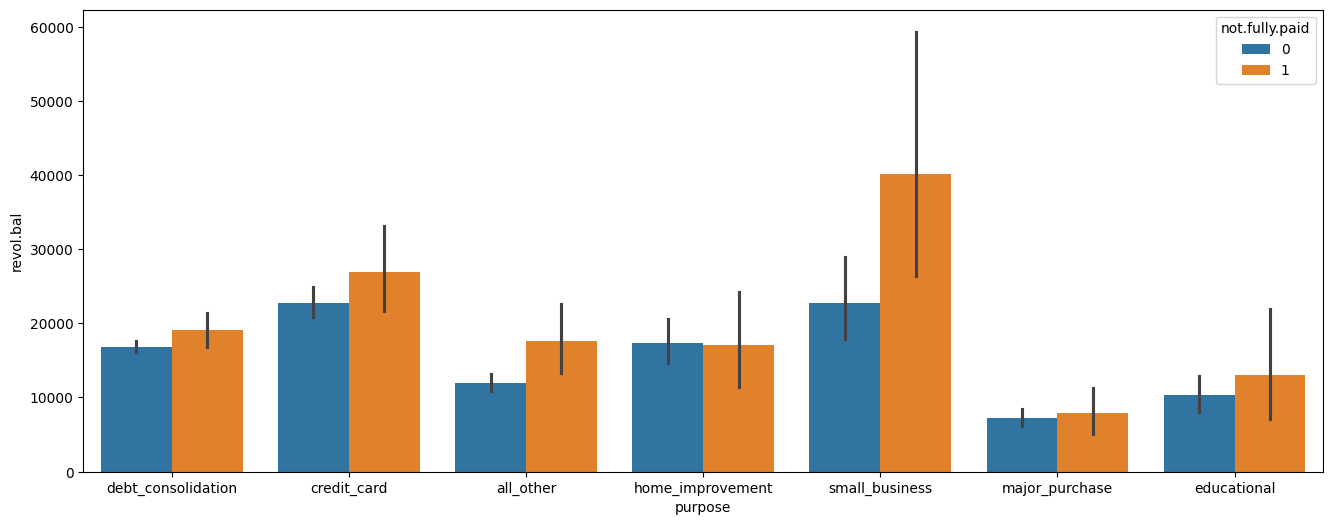

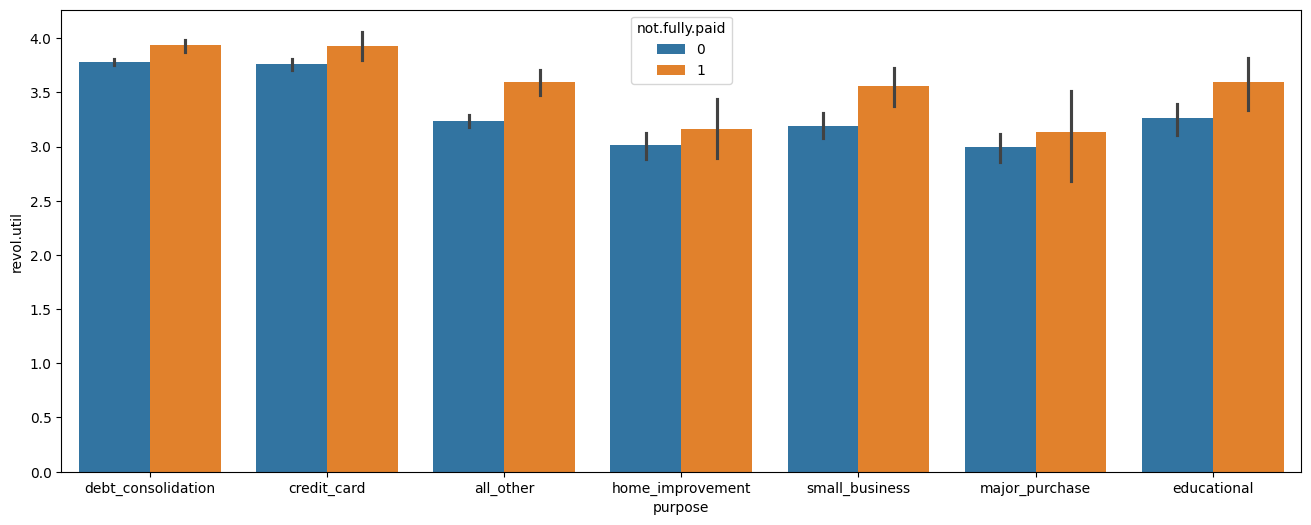

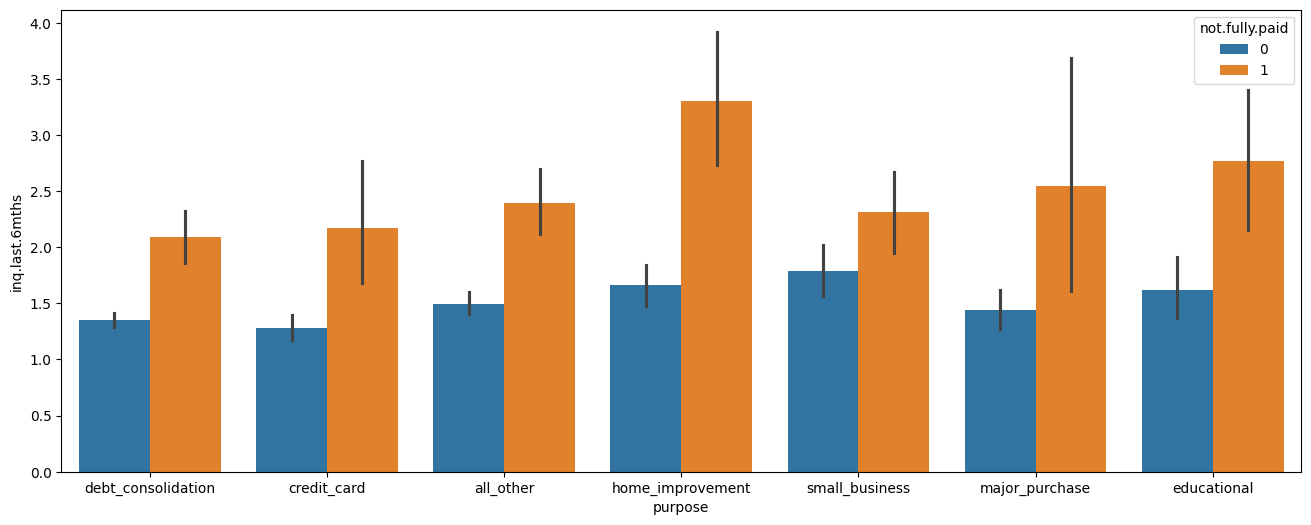

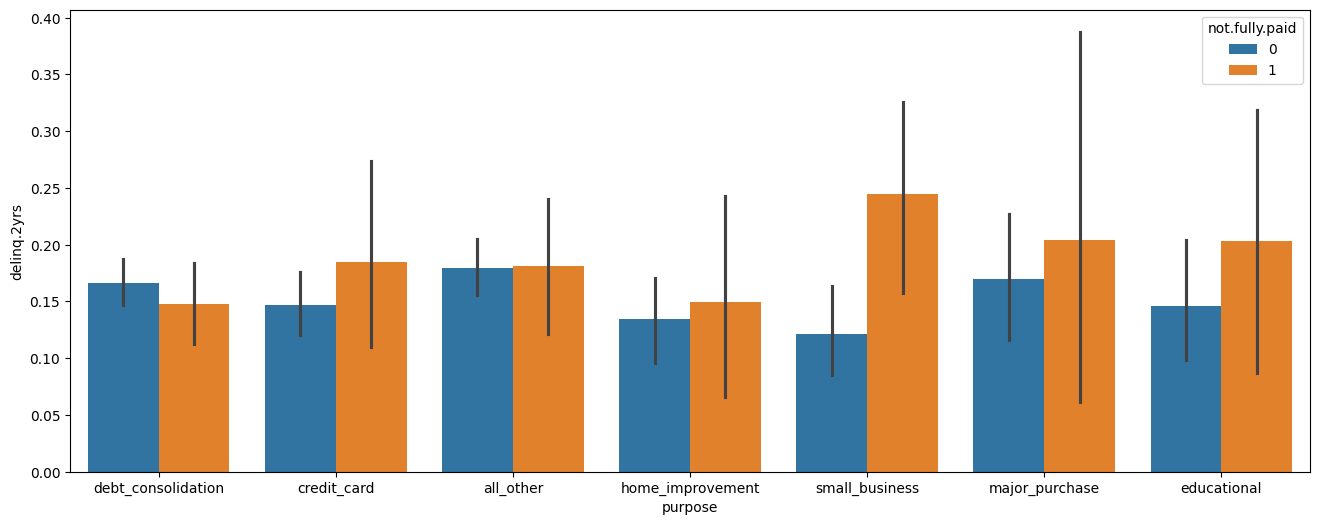

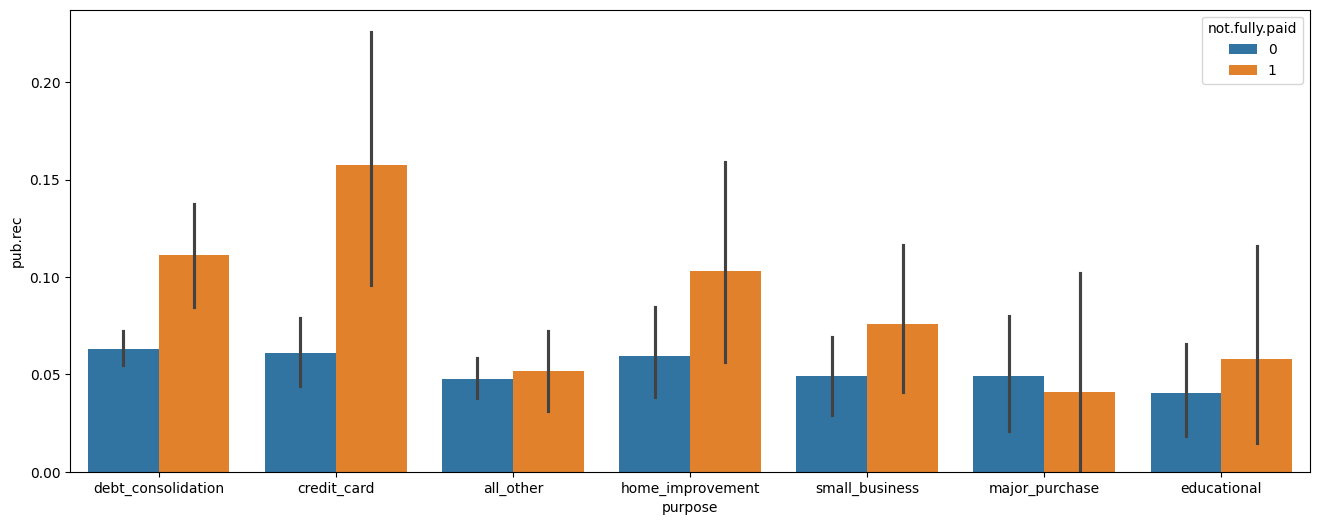

In [219]:
plt.figure(figsize=(16, 6))
for i in list(loans_df):
    if i not in ("purpose", "not.fully.paid"):
        plt.figure(figsize=(16, 6))
        sns.barplot(loans_df, x="purpose", y=i, hue="not.fully.paid")

From these bar charts, it seems as thought most features have a noticeable difference depending on whether or not `not.fully.paid` is true or not. The noticeable exceptions being `log.annual.inc` and `fico`. This might suggest that these two `features` are not useful in determining whether `not.fully.paid` is a 0 or 1.

#### Conclusion

I believe that this dataset would be sufficient in creating a good binary classifier. This comes from the fact that it is well-curated which can be seen in the easily understood column names as well as the lack of need for data cleaning. Furthermore, in the analysis, none of columns were too similar in terms high correlation. Additionally,the catergorical variables have a not insignificant difference whether an applicant paid back their loan and so if this dataset is to be used, splitting it up might be beneficial. In addition, given that this dataset has more than double the number of data entries, our binary classifier will have a lot of data to learn from.